In [1]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio
pio.renderers.default = 'notebook' 
pio.renderers.default = 'iframe_connected'

# Project
## Swiggy EDA Analysis 

In [4]:
df = pd.read_excel(r"C:\Users\vigne\Downloads\Internship Record\swiggy_menu_dataset.xlsx")
df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


# Data Info 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            3101 non-null   object 
 1   City             3101 non-null   object 
 2   Restaurant Name  3101 non-null   object 
 3   Location         3101 non-null   object 
 4   Category         3101 non-null   object 
 5   Dish Name        3101 non-null   object 
 6   Price (INR)      3101 non-null   float64
 7   Rating           3101 non-null   float64
 8   Rating Count     3101 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 218.2+ KB


In [ ]:
df.shape

(3101, 9)

In [6]:
df.describe()

,Price (INR),Rating,Rating Count
count,3101.000000,3101.000000,3101.000000
mean,252.466362,2.910094,24.704611
std,246.556849,2.091944,68.552700
min,0.950000,0.000000,0.000000
25%,119.000000,0.000000,0.000000
50%,216.000000,4.100000,3.000000
75%,310.000000,4.600000,17.000000
max,3499.000000,5.000000,987.000000


# Data Cleaning & Handling

In [7]:
df.isna().sum()

State              0
City               0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

# EDA & Visualization 

In [21]:
# Best Rated Restaurants (with at least 10 items listed)
rest_stats = df.groupby('Restaurant Name').agg({'Rating': 'mean', 'Dish Name': 'count'})
top_rest = rest_stats[rest_stats['Dish Name'] > 10].sort_values(by='Rating', ascending=False).head(5)
print("\n--- Top 5 Best Rated Restaurants (Min. 10 Items) ---")
print(top_rest)


--- Top 5 Best Rated Restaurants (Min. 10 Items) ---
                             Rating  Dish Name
Restaurant Name                               
Polar Bear                 4.391935         62
A2B - Adyar Ananda Bhavan  4.322500         40
Subway                     4.300000         20
Nandhana Palace            3.951429         70
Theobroma                  3.833962         53


In [ ]:
# ADVANCED GROUPING & INSIGHTS
# Average price per location (Top 10)
avg_price_loc = df.groupby('Location')['Price (INR)'].mean().sort_values(ascending=False).head(10)
print("\n--- Top 10 Locations with Highest Average Price ---")
print(avg_price_loc)


--- Top 10 Locations with Highest Average Price ---
Location
Vijay Nagar               810.961538
Forum Mall                765.925926
Kanakapura                427.694737
Jawaharlal Nehru Road     416.481132
Global Mall               300.937051
Gopalan Arcade Mall       273.583577
Mysore Road               257.500000
Kanakapura Road           255.734340
Rajarajeshwari Nagar      254.079415
Kengeri Satellite Town    233.762319
Name: Price (INR), dtype: float64


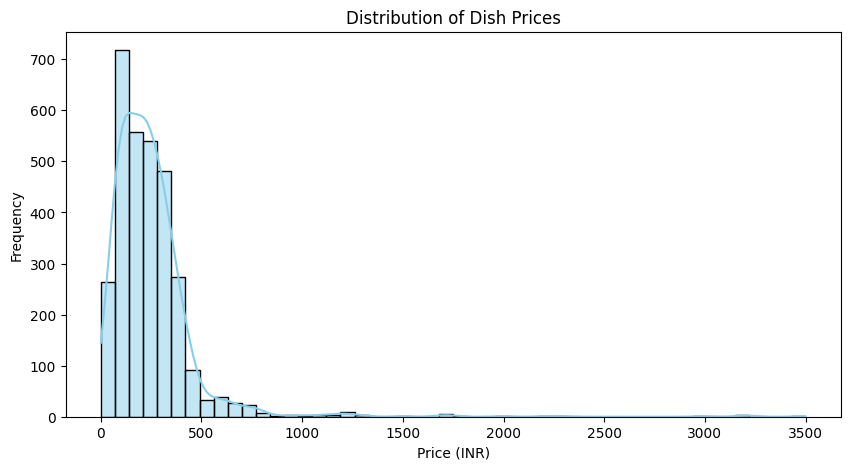

In [ ]:
# Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Price (INR)'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Dish Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

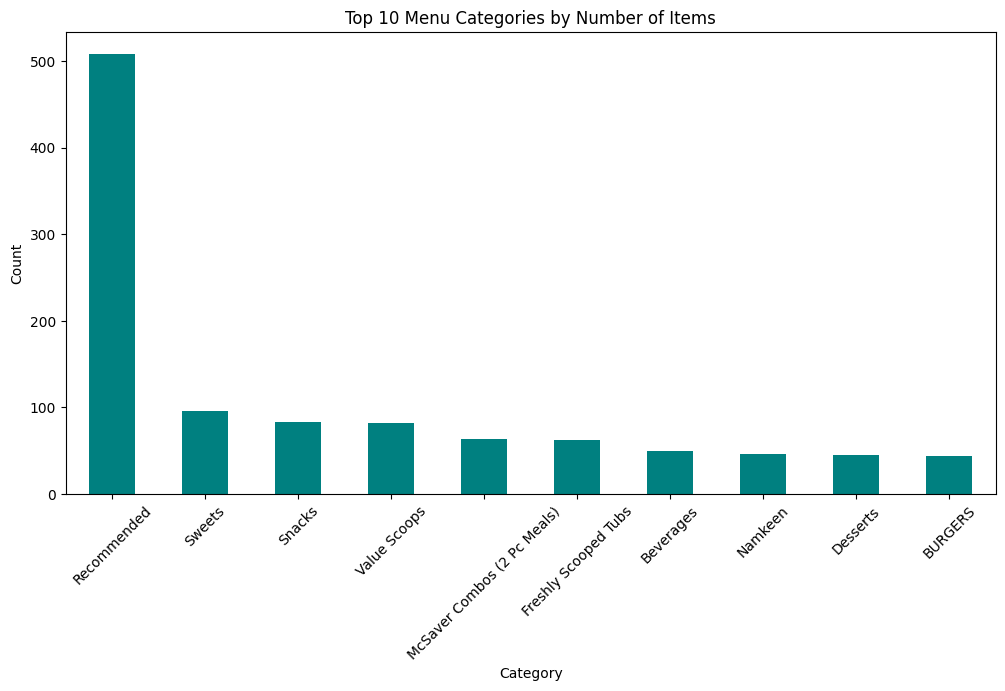

In [ ]:
# Top 10 Categories by Volume
plt.figure(figsize=(12, 6))
df['Category'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Menu Categories by Number of Items')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

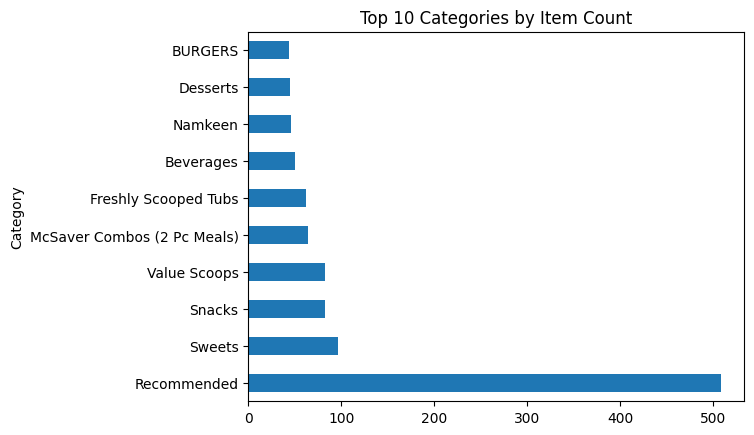

In [11]:
# Top Categories
df['Category'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Categories by Item Count')
plt.savefig('top_categories.png')

# Top 15 Restaurant that got the lowest rating and highest rating count 

In [28]:
# Filtering for quality analysis
# We filter for items with Rating > 0 to exclude "unrated" items which might skew the average.
rated_items = df[df['Rating'] > 0]

In [ ]:
# Group by Restaurant Name
# We calculate the mean rating and the total number of ratings received.
restaurant_stats = rated_items.groupby('Restaurant Name').agg({
    'Rating': 'mean',
    'Rating Count': 'sum'
}).reset_index()

In [ ]:
# Sorting for the "Lowest Rating" and "Highest Rating Count"
# We sort by Rating in Ascending order (lowest first) 
# and Rating Count in Descending order (most feedback first)
lowest_rated_popular = restaurant_stats.sort_values(
    by=['Rating', 'Rating Count'], 
    ascending=[True, False]
).head(15)

In [ ]:
# Display the results
print("Top 15 Restaurants with the Lowest Average Rating (among rated items):")
print(lowest_rated_popular.to_string(index=False))


Top 15 Restaurants with the Lowest Average Rating (among rated items):
                 Restaurant Name   Rating  Rating Count
                Swadh Restaurant 3.300000             4
    chickpet Donne Biryani House 3.971429           510
                       Taco Bell 4.044444           234
             Nisarga Family Daba 4.058333           120
      Appu Donne Biriyani Palace 4.127778          1337
               Dum Safar Biryani 4.132000            87
Kwality Walls Ice Cream and More 4.150000             8
                       Pizza Hut 4.187075          3171
                     Quick Crave 4.188235            34
  Olio - The Wood Fired Pizzeria 4.229921          1452
                      McDonald's 4.246491          6953
          The Belgian Waffle Co. 4.256250           144
      LunchBox  Meals and Thalis 4.257377          3397
                     Burger King 4.278899          4359
                     Chinese Wok 4.283333           709


# Category list by pie chart 

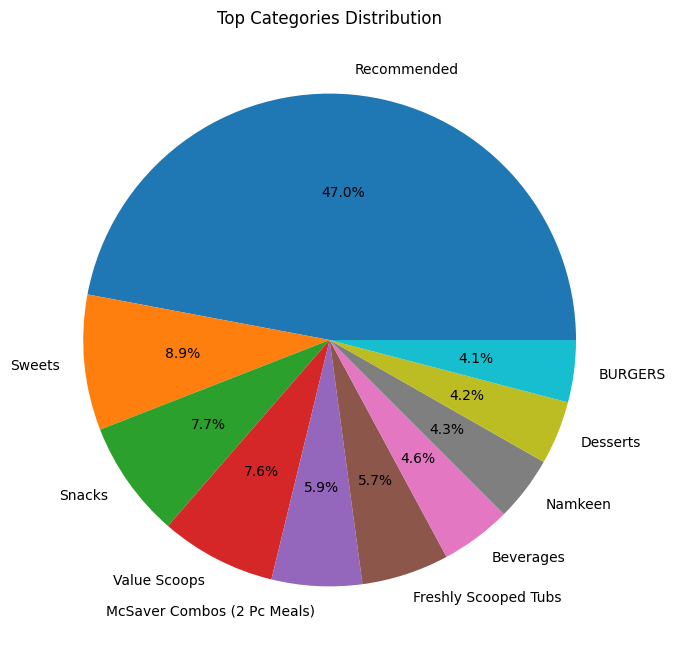

In [33]:
import matplotlib.pyplot as plt

# Step 1: Get top categories (optional)
top_categories = df["Category"].value_counts().nlargest(10)

# Step 2: Plot pie chart
plt.figure(figsize=(12, 8))
top_categories.plot(kind="pie", autopct="%1.1f%%")
plt.title("Top Categories Distribution")
plt.ylabel("") 
plt.show()


In [34]:
df["Location"].value_counts().reset_index(name="Count")

,Location,Count
0,Rajarajeshwari Nagar,820
1,Kengeri,656
2,Kengeri Satellite Town,345
3,Kanakapura Road,159
4,vijayanagar,151
5,Gopalan Arcade Mall,137
6,KENGERI SATELLITE TOWN,121
7,KENGERI UPANAGAR,121
8,Jawaharlal Nehru Road,106
9,Kanakapura,95


## Top 25 Dishes that has highest rating count

<Axes: title={'center': 'Top 25 Dishes that has highest rating count'}, xlabel='Dish Name'>

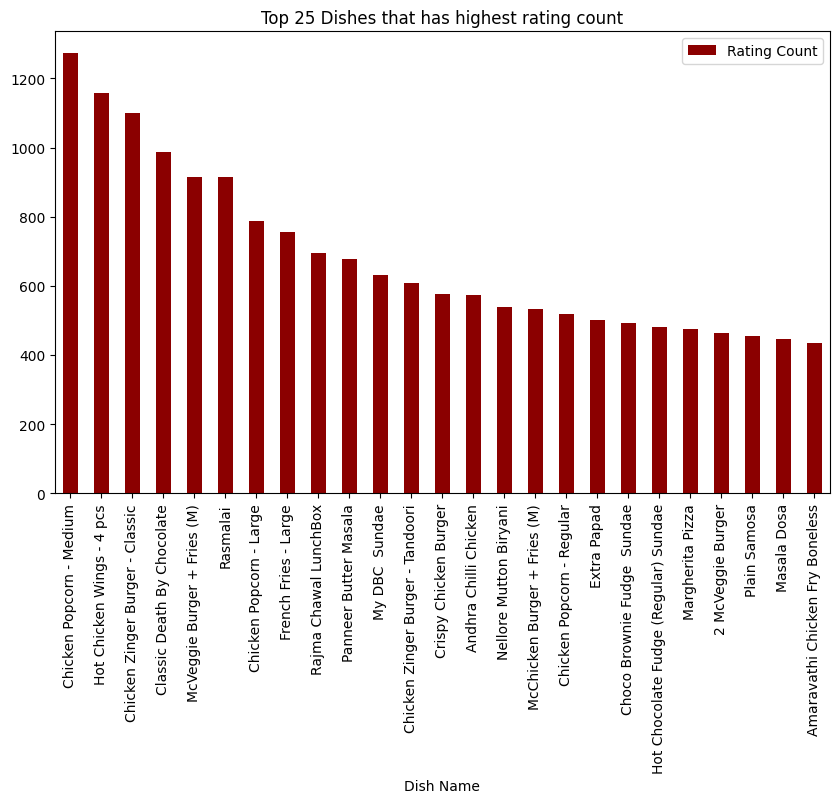

In [15]:
dish_count=df.groupby("Dish Name")["Rating Count"].sum().sort_values(ascending=False).reset_index().head(25)
dish_count.plot(kind="bar",x="Dish Name",figsize=(10,6),title="Top 25 Dishes that has highest rating count",color="darkred")

In [18]:
max_price = df["Price (INR)"].max()
highest_price_row = df[df["Price (INR)"] == max_price]

highest_price_row


,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
747,Karnataka,Bengaluru,Olio - The Wood Fired Pizzeria,Jawaharlal Nehru Road,Kids Special - Pizza Party,Kids Birthday Pizza Party with Chocolate Cake ...,3499.0,0.0,0
1917,Karnataka,Bengaluru,Olio - The Wood Fired Pizzeria,Kanakapura,Kids Special - Pizza Party,Kids Birthday Pizza Party with Chocolate Cake ...,3499.0,0.0,0
